<a href="https://colab.research.google.com/github/JAPETHj/ARVR_project/blob/main/SEN%2CBCN_and_PINN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: enc_boundary is a 60 lenght numpy array. add 60 columns to combined_df and add these 60 values in each column

import numpy as np

for i in range(60):
  combined_df["enc_boundary_" + str(i)] = encoded_boundary[i]

print(combined_df)

0           x-coordinate      y-coordinate   total-pressure       x-velocity  \
0       -1.000000000E+01  -1.000000000E+01  6.401010156E-01  1.000000000E+00   
1       -8.180340767E+00  -1.000000000E+01  6.400718093E-01  1.000665069E+00   
2       -6.387341022E+00  -1.000000000E+01  6.398889422E-01  1.002148628E+00   
3       -4.696190357E+00  -1.000000000E+01  6.392056942E-01  1.004284620E+00   
4       -3.125059366E+00  -1.000000000E+01  6.375854611E-01  1.005931973E+00   
...                  ...               ...              ...              ...   
354635   8.924691200E+00   1.000000000E+01  6.242436171E-01  1.012355208E+00   
354636   1.043871403E+01   1.000000000E+01  6.220536828E-01  1.009628892E+00   
354637   1.195575809E+01   1.000000000E+01  6.198765635E-01  1.007151246E+00   
354638   1.347588158E+01   1.000000000E+01  6.180498004E-01  1.005093098E+00   
354639   1.500000000E+01   1.000000000E+01  6.165777445E-01  1.004240870E+00   

0            y-velocity   t  enc_bounda

In [ ]:
# prompt: drop first and last 2 columns of df

combined_df = combined_df.iloc[:, 1:-2]
print(combined_df)


0           x-coordinate      y-coordinate   total-pressure       x-velocity  \
0       -1.000000000E+01  -1.000000000E+01  6.401010156E-01  1.000000000E+00   
1       -8.180340767E+00  -1.000000000E+01  6.400718093E-01  1.000665069E+00   
2       -6.387341022E+00  -1.000000000E+01  6.398889422E-01  1.002148628E+00   
3       -4.696190357E+00  -1.000000000E+01  6.392056942E-01  1.004284620E+00   
4       -3.125059366E+00  -1.000000000E+01  6.375854611E-01  1.005931973E+00   
...                  ...               ...              ...              ...   
354635   8.924691200E+00   1.000000000E+01  6.242436171E-01  1.012355208E+00   
354636   1.043871403E+01   1.000000000E+01  6.220536828E-01  1.009628892E+00   
354637   1.195575809E+01   1.000000000E+01  6.198765635E-01  1.007151246E+00   
354638   1.347588158E+01   1.000000000E+01  6.180498004E-01  1.005093098E+00   
354639   1.500000000E+01   1.000000000E+01  6.165777445E-01  1.004240870E+00   

0            y-velocity  
0       0.000

In [ ]:
# prompt: create a code to make a dataframe by appending all the dataframes in the folder data_points

import pandas as pd
import os

data_frames = []

# Get the list of files in the data_points folder
files = os.listdir('/content/data_points')

# Iterate through each file in the folder
for file in files:
  # Read the CSV file into a DataFrame
  df = pd.read_csv(os.path.join('data_points', file), sep='\s+', header=None, decimal='.')
  df.columns = df.iloc[0]
  df = df.iloc[1:]
  #df = pd.read_csv(os.path.join('data_points', file))

  # Append the DataFrame to the list
  data_frames.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames,ignore_index=True)


In [ ]:
'''def vae_loss(inputs, reconstructed, mean, log_var):
    #recon_loss = chamfer_distance(inputs.numpy(), reconstructed.numpy())
    recon_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.mean_squared_error(inputs, reconstructed), axis=-1))
    kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
    return recon_loss + kl_loss'''

In [ ]:
'''import numpy as np
from scipy.spatial import KDTree

def chamfer_distance(A, B):
    """
    Computes the chamfer distance between two sets of points A and B.
    """
    tree = KDTree(B)
    dist_A = tree.query(A)[0]
    tree = KDTree(A)
    dist_B = tree.query(B)[0]
    return np.mean(dist_A) + np.mean(dist_B)'''

In [ ]:
'''import tensorflow_graphics.nn.loss as tfg_loss
def vae_loss(inputs, reconstructed, mean, log_var):
    # Use TensorFlow Graphics for differentiable Chamfer distance
    inputs = tf.cast(inputs, tf.float64)
    reconstructed = tf.cast(reconstructed, tf.float64)
    recon_loss = tfg_loss.chamfer_distance.evaluate(inputs, reconstructed)
    kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
    return recon_loss + tf.cast(tf.reduce_sum(kl_loss), tf.float64)
def train_vae(model, X_train, optimizer, epochs, batch_size):
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(0, len(X_train), batch_size):
            x_batch = X_train[batch:batch + batch_size]
            with tf.GradientTape() as tape:
                reconstructed, mean, log_var = model(x_batch)
                loss = vae_loss(x_batch, reconstructed, mean, log_var)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += loss
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss.numpy() / len(X_train)}')
optimizer = tf.keras.optimizers.Adam()
train_vae(vae, X_train, optimizer, epochs=50, batch_size=32)'''

In [ ]:
'''input_data = tf.expand_dims(X_train[0], axis=0)
encoded_version = vae.encoder(input_data)
decoded_version = vae.decoder(encoded_version[0])
print(X_train[0][0:5])
print("Decoded version:", decoded_version[0][0:5])'''

In [ ]:
print(combined_df)

0      nodenumber      x-coordinate      y-coordinate   total-pressure  \
0               1  -1.000000000E+01  -1.000000000E+01  6.401010156E-01   
1               2  -8.180340767E+00  -1.000000000E+01  6.400718093E-01   
2               3  -6.387341022E+00  -1.000000000E+01  6.398889422E-01   
3               4  -4.696190357E+00  -1.000000000E+01  6.392056942E-01   
4               5  -3.125059366E+00  -1.000000000E+01  6.375854611E-01   
...           ...               ...               ...              ...   
354635      17728   8.924691200E+00   1.000000000E+01  6.242436171E-01   
354636      17729   1.043871403E+01   1.000000000E+01  6.220536828E-01   
354637      17730   1.195575809E+01   1.000000000E+01  6.198765635E-01   
354638      17731   1.347588158E+01   1.000000000E+01  6.180498004E-01   
354639      17732   1.500000000E+01   1.000000000E+01  6.165777445E-01   

0            x-velocity       y-velocity      x-coordinate      y-coordinate  
0       1.000000000E+00  0.00000

In [ ]:
# prompt: create a new column t having 1 repeted 17732 times,2 repeated 17732 times...20 repeted 17732 times

new_column_values = []
for i in range(1, 21):
    new_column_values.extend([i] * 17732)
combined_df['t'] = new_column_values


In [ ]:
# prompt: change names of  first 6 columns to x,y,p,u,v,t

combined_df.columns = ['x', 'y', 'p', 'u', 'v', 't'] + list(combined_df.columns)[6:]


In [ ]:
!pip install -q tensorflow_graphics #//////////\\\\\\\\\\\You need to install this first time if in jupyter else install every time in colab///////////\\\\\\\\\\\\

In [ ]:
'''
Dataset creation for BCN and SEN
'''
#For BCN we have created a dataframe of distances of x,y,distance with random numbers
df = pd.DataFrame({
    'x': np.random.rand(20*1000).astype(np.float32),
    'y': np.random.rand(20*1000).astype(np.float32),
    'distance': np.random.rand(20*1000).astype(np.float32)
})
l=[]
new_df = pd.DataFrame(columns=['x,y'])
#print(df)
for i in range(20):
    zero_indices = np.random.choice(range(i*1000, (i+1)*1000), 400, replace=False)
    df.loc[zero_indices, 'distance'] = 0#Here I have made some distances 0 so as to resemble boundary points
for i in range(20):
   #print(np_array)
   for j in range(1000):
     if df["distance"].iloc[i * 1000 + j]==0:
      l.append([df["x"].iloc[i * 1000 + j],df["y"].iloc[i * 1000 + j]])
     else:
      continue
   new_df.loc[i]=[np.array(l)]
   l=[]
print(df)
print(new_df)
data=df[["x","y"]]
labels=df["distance"]
data=tf.convert_to_tensor(data)#Converting data to tensor
labels=tf.convert_to_tensor(labels)#Converting the labels to tensor

              x         y  distance
0      0.052360  0.129993  0.319711
1      0.657131  0.447480  0.000000
2      0.828878  0.030633  0.719944
3      0.223030  0.908762  0.000000
4      0.813335  0.269179  0.298732
...         ...       ...       ...
19995  0.038663  0.488257  0.000000
19996  0.067802  0.253679  0.000000
19997  0.553791  0.587489  0.000000
19998  0.474244  0.146277  0.540305
19999  0.009073  0.969161  0.000000

[20000 rows x 3 columns]
                                                  x,y
0   [[0.65713096, 0.4474796], [0.22302985, 0.90876...
1   [[0.68899506, 0.6511867], [0.026832242, 0.5026...
2   [[0.62352186, 0.60929805], [0.36535996, 0.5126...
3   [[0.72128063, 0.18040578], [0.10133915, 0.1073...
4   [[0.75582767, 0.42949426], [0.33587304, 0.6585...
5   [[0.18719399, 0.24600255], [0.9960025, 0.16822...
6   [[0.7930421, 0.47935164], [0.5533157, 0.246132...
7   [[0.47004145, 0.8910386], [0.0692239, 0.807358...
8   [[0.7298154, 0.539192], [0.042281527, 0.138102...
9 

In [ ]:
'''
IN this section we are importing the modules
'''
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers,Model,models#for the models
from tensorflow.keras.optimizers import Adam
#import tensorflow_graphics.nn.loss as tfg_loss#this is particularly for chamfer loss
from sklearn.neighbors import KDTree#This is for chamfer loss(Source:Medium Article)
from tensorflow.keras.layers import Input, Dense, Concatenate
import random

In [ ]:
data_sen=pd.read_csv("/content/boundary.csv")

In [ ]:
data_sen.head()

,X [ m ],Y [ m ],Z [ m ],Pressure [ Pa ],Velocity u [ m s^-1 ],Velocity v [ m s^-1 ]
0,0.500000,6.123234e-17,-0.004899,-0.554336,0.0,0.0
1,0.500000,6.123234e-17,0.004899,-0.554336,0.0,0.0
2,0.499899,1.006159e-02,0.004899,-0.543604,0.0,0.0
3,0.499899,1.006159e-02,-0.004899,-0.543604,0.0,0.0
4,0.499594,2.014425e-02,0.004899,-0.532011,0.0,0.0


In [ ]:
data_sen.drop(data_sen.columns[-4:], axis=1, inplace=True)

In [ ]:
data_sen.head()

,X [ m ],Y [ m ]
0,0.500000,6.123234e-17
1,0.500000,6.123234e-17
2,0.499899,1.006159e-02
3,0.499899,1.006159e-02
4,0.499594,2.014425e-02


In [ ]:
# prompt: convert every combined_df value to double

combined_df = combined_df.astype('double')


In [ ]:
data_bcn_check=pd.DataFrame(columns=['x','y'])
for i in range(0,data_sen.shape[0]):
  if i%2==0:
   data_bcn_check.loc[i]=[data_sen.iloc[i,0],data_sen.iloc[i,1]]

In [ ]:
data_bcn_check.shape[0]

313

In [ ]:
import time
for i in range(0,data_bcn1.shape[0]):
  min_dist=10000000
  for j in range(0,data_bcn_check.shape[0]):
    dist=np.sqrt((data_bcn1.iloc[i,0]-data_bcn_check.iloc[j,0])**2+(data_bcn1.iloc[i,1]-data_bcn_check.iloc[j,1])**2)
    if dist<min_dist:
      min_dist=dist
  if i%1000==0:
    t1=time.time()
    print(i)
  data_bcn1.iloc[i,2]=min_dist

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [ ]:
data_bcn=combined_df.iloc[17732:35464,0:2]

In [ ]:
data_bcn1=data_bcn.copy()

In [ ]:
data_bcn1.reset_index(drop=True,inplace=True)

17732

In [ ]:
# prompt: make an empty column dist in data_BCN

data_bcn1['dist'] = None


In [ ]:
df=pd.DataFrame(columns=['col'])
np_arr=[]
for i in range(data_sen.shape[0]):
  if i%2==0:
    x=data_sen.iloc[i,0]
    y=data_sen.iloc[i,1]
    arr=[x,y]
    np_arr.append(arr)
  else:
    continue
for i in range(0,200):
  df.loc[i]=[np.array(np_arr)]

In [ ]:
data_bcn.shape[0]

17732

In [ ]:
'''
Dummy Dataset creation for SEN testing
'''
#This code creates a pandas dataframe with numpy arrays for dummy tasting. It is basically a set of 1000 numpy arrys(corr. to each shape) each with 400 [x,y] coordinates each.
#df = pd.DataFrame({'col':  for _ in range(200)]})
X_train = tf.stack(df['col'].values)#Converts the df to a tensor for direct value input into model
original_shape=[313,2]
prod_shape=800
latent_dim=60
print(df)

                                                   col
0    [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
1    [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
2    [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
3    [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
4    [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
..                                                 ...
195  [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
196  [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
197  [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
198  [[0.5, 6.12323426e-17], [0.499898762, 0.010061...
199  [[0.5, 6.12323426e-17], [0.499898762, 0.010061...

[200 rows x 1 columns]


In [ ]:
'''
Dummy Dataset creation for SEN testing
'''
#This code creates a pandas dataframe with numpy arrays for dummy tasting. It is basically a set of 1000 numpy arrys(corr. to each shape) each with 400 [x,y] coordinates each.
#df = pd.DataFrame({'col': [np.random.random([400,2]) for _ in range(200)]})
#X_train = tf.stack(new_df['x,y'].values)#Converts the df to a tensor for direct value input into model
X_train=data_tensor
original_shape=[313,2]
prod_shape=313*2
latent_dim=60
#print(new_df)

In [ ]:
'''
Chamfer distance for SEN loss
'''
###This is the chamfer distance. We have modified it from the medium article using gemini ai for our case
def chamfer_distance(A, B):
    chamfer_dist = 0
    for i in range(A.shape[0]): # Iterate over batch
        tree_A = KDTree(A[i])
        tree_B = KDTree(B[i])
        dist_A, _ = tree_A.query(B[i])
        dist_B, _ = tree_B.query(A[i])
        chamfer_dist += (np.mean(dist_A) + np.mean(dist_B))
    return chamfer_dist / A.shape[0] # Average over batch

In [ ]:
latent_dim=60

In [ ]:
'''
SEN MODEL DEFINATION
'''
###This is the VAE auto encoder
class Encoder(Model):
  def __init__(self, latent_dim):#The latent dimension is the size of the encoded array
    super(Encoder, self).__init__()
    '''
    This part of the code is the encoder part. It is a 1D conv network which transfroms each [400,2] array into a 1d list of size 60
    '''
    self.conv1=layers.Conv1D(128,kernel_size=2,strides=1,padding='same',activation='tanh',input_shape=[original_shape])
    self.conv2=layers.Conv1D(128,kernel_size=2,strides=1,padding='same',activation='tanh')
    self.conv3=layers.Conv1D(256,kernel_size=2,strides=1,padding='same',activation='tanh')
    self.conv4=layers.Conv1D(512,kernel_size=2,strides=1,padding='same',activation='tanh')
    self.maxpool=layers.GlobalMaxPooling1D()# maxpooling converts to 512*2 array to a 512*1 array
    self.fc1=layers.Dense(256,activation='tanh')
    self.fc2=layers.Dense(256,activation='tanh')
    self.fc3=layers.Dense(256,activation='tanh')
    self.mean=layers.Dense(latent_dim)#The mean of the encoded array
    self.logvar=layers.Dense(latent_dim)#The variance of the encoded array. This is the technique used in VAE.
  def call(self,x):#Call function
    x=self.conv1(x)
    x=self.conv2(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=self.maxpool(x)
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    mean=self.mean(x)
    logvar=self.logvar(x)
    return mean,logvar
class Decoder(Model):
  def __init__(self, original_shape):#Original shape is the input as is seen
    super(Decoder, self).__init__()
    '''
    The decoder modele which transforms the encoded array into the original shape.
    '''
    self.fc1=layers.Dense(128,activation='tanh')
    self.fc2=layers.Dense(128,activation='tanh')
    self.fc3=layers.Dense(626,activation='tanh')#Since we are using 400*2 this is 800. This will vary depending upon original shape
    self.reshape_layer=layers.Reshape(original_shape)#Reshaping into our array
  def call(self,x):#The call function
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    x=self.reshape_layer(x)
    return x
class VAE(Model):
  def __init__(self, latent_dim, original_shape):
    super(VAE, self).__init__()
    self.encoder=Encoder(latent_dim)
    self.decoder=Decoder(original_shape)
  def call(self,x):
    '''
    This encompasses the actual method a VAE works.
    So what is done is a mean and variance of the latent vector is guessed. Now using gaussian distribution we construct a vector having that mean and variance.
    Then we reconstruct the new vector using the decoder.
    The loss I will explain later
    '''
    mean,log_var=self.encoder(x)
    epsilon = tf.random.normal(shape=tf.shape(mean))
    z = mean + tf.exp(log_var * 0.5) * epsilon
    reconstructed = self.decoder(z)
    return reconstructed,mean,log_var
vae = VAE(original_shape=original_shape, latent_dim=latent_dim)#Calling the model is necessary
vae.build(input_shape=[None,*original_shape])#Building the VAE model. This is the alternative of tensorflow.session in tf 2.0
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  655736    
                                                                 
 decoder (Decoder)           multiple                  105074    
                                                                 
Total params: 760810 (2.90 MB)
Trainable params: 760810 (2.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''
SEN loss and custom training
'''
error_loss={}
def vae_loss(inputs, reconstructed, mean, log_var):
    '''
    So here I will define the loss
    So the loss has 2 parts: The chamfer loss which is the difference between nearest vectors in constructed and reconstructed array
    The recon loss is another part of VAE which is used to control overfitting
    '''
    inputs = tf.cast(inputs, tf.float64)
    reconstructed = tf.cast(reconstructed, tf.float64)
    #recon_loss = tfg_loss.chamfer_distance.evaluate(inputs, reconstructed)#Calculating the Chamfer loss using earlier functions

    recon_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.mean_squared_error(inputs, reconstructed), axis=-1))
    recon_loss=tf.reduce_mean(recon_loss)
    kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
    return recon_loss + tf.cast(tf.reduce_sum(kl_loss), tf.float64)

    '''
    recon_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(inputs, reconstructed),axis=1))
    kl_loss = -0.5 * (1 + log_var - tf.square(mean) - tf.exp(log_var))
    kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss))
    return recon_loss + tf.cast(kl_loss, tf.float64)
    '''
    #return recon_loss
    #return recon_loss #this return the loss as double type. This is an issue which we have corrected
def train_vae(model, X_train, optimizer, epochs, batch_size):#The custom training
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch in range(0, len(X_train), batch_size):
            x_batch = X_train[batch:batch + batch_size]#Here we pick batches from original data
            '''
            The following is the famous method of how we apply backpropagation in tensorflow
            '''
            with tf.GradientTape() as tape:#This is the alternative of tf.gradients in tf 2.0 . We have to use tape to keep track of how loss is changing
                reconstructed, mean, log_var = model(x_batch)#First we predict using the model
                loss = vae_loss(x_batch, reconstructed, mean, log_var)#calculating the loss
            gradients = tape.gradient(loss, model.trainable_variables)#backward pass to calculate gradients
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))#using gradient descent(So here zip maps the gradients to their respective training variables)
            epoch_loss += loss.numpy()
        error_loss[epoch]=epoch_loss
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / len(X_train)}')#Printing the loss
optimizer = tf.keras.optimizers.Adam()#We have used adam optimizer
train_vae(vae, X_train, optimizer, epochs=100, batch_size=32)#Training command

Epoch [1/100], Loss: 1.4585697213796545
Epoch [2/100], Loss: 0.31654664208177374
Epoch [3/100], Loss: 0.1246328864207164
Epoch [4/100], Loss: 0.0967752374604365
Epoch [5/100], Loss: 0.07714067036582466
Epoch [6/100], Loss: 0.07145357365451296
Epoch [7/100], Loss: 0.06676740989221147
Epoch [8/100], Loss: 0.06406498074814418
Epoch [9/100], Loss: 0.06016790507555987
Epoch [10/100], Loss: 0.05812038082517372
Epoch [11/100], Loss: 0.055756738025797434
Epoch [12/100], Loss: 0.054722125536092264
Epoch [13/100], Loss: 0.05224229360482083
Epoch [14/100], Loss: 0.05044125021881661
Epoch [15/100], Loss: 0.04797061274048623
Epoch [16/100], Loss: 0.04633917470056003
Epoch [17/100], Loss: 0.043454842463970175
Epoch [18/100], Loss: 0.04144199486262354
Epoch [19/100], Loss: 0.03999823331197061
Epoch [20/100], Loss: 0.03694842478122133
Epoch [21/100], Loss: 0.035064656394703964
Epoch [22/100], Loss: 0.032101228853118016
Epoch [23/100], Loss: 0.03071049130435128
Epoch [24/100], Loss: 0.02910883863336872

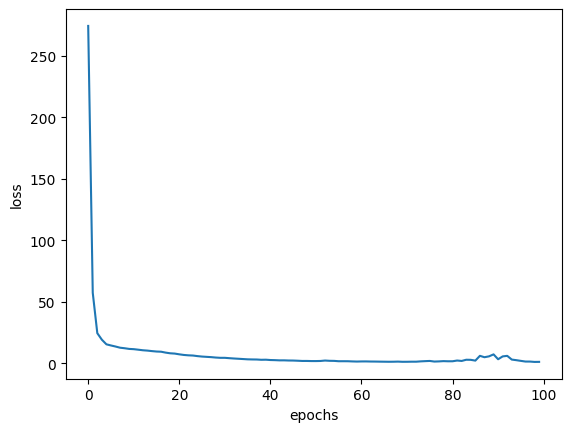

In [ ]:
# prompt: plot the keys of a dictionary as x and values as y

import matplotlib.pyplot as plt

def plot_dict(dictionary):
  """
  Plots the keys of a dictionary as x and values as y.

  Args:
    dictionary: The dictionary to plot.
  """
  x = list(dictionary.keys())
  y = list(dictionary.values())
  plt.plot(x, y)
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()

# Example usage
plot_dict(error_loss)


In [ ]:
input_data = tf.cast(tf.expand_dims(X_train[0], axis=0),tf.float32)
encoded_version = vae.encoder(input_data)
decoded_version = vae.decoder(encoded_version[0])
#print(input_data[0:10])
#print(decoded_version[0:10])
# Cast decoded_version to float32 to match input_data
decoded_version = tf.cast(decoded_version, tf.float32)

error_percent = tf.reduce_mean(tf.abs(decoded_version - input_data)) / tf.reduce_mean(tf.abs(input_data)) * 100
print(f"Reconstruction accuracy: {100.00-error_percent:.2f}%")

Reconstruction accuracy: 99.36%


In [ ]:
print(error_percent)

tf.Tensor(50.197826, shape=(), dtype=float32)


In [ ]:
enc_mean,enc_logvar=vae.encoder(X_train)
encoded_boundary=enc_mean[0].numpy()

In [ ]:
import pandas as pd
pinn_df1 = pd.DataFrame(columns=[f"x" for i in range(1, 2)] + ["y", "t"] + [f"a{i}" for i in range(1, 61)])
pinn_df1= pinn_df1.reindex(range(240000))
new_df_1=df[df["distance"]!=0.0000]
print(new_df_1)

              x         y  distance
0      0.052360  0.129993  0.319711
2      0.828878  0.030633  0.719944
4      0.813335  0.269179  0.298732
5      0.297848  0.407121  0.667602
7      0.786214  0.712972  0.897338
...         ...       ...       ...
19991  0.552150  0.842667  0.949635
19992  0.050586  0.022517  0.343059
19993  0.249585  0.911743  0.813983
19994  0.216718  0.905107  0.196116
19998  0.474244  0.146277  0.540305

[12000 rows x 3 columns]


In [ ]:
new_df_1_expanded = pd.DataFrame(np.repeat(new_df_1.values, 20, axis=0), columns=new_df_1.columns)
new_df_1_expanded['t'] = np.tile(np.arange(1, 21), len(new_df_1))
new_df_1_expanded.drop(columns=['distance'], inplace=True)
new_df_1_expanded = new_df_1_expanded.astype(np.float32)
print(new_df_1_expanded)

               x         y     t
0       0.052360  0.129993   1.0
1       0.052360  0.129993   2.0
2       0.052360  0.129993   3.0
3       0.052360  0.129993   4.0
4       0.052360  0.129993   5.0
...          ...       ...   ...
239995  0.474244  0.146277  16.0
239996  0.474244  0.146277  17.0
239997  0.474244  0.146277  18.0
239998  0.474244  0.146277  19.0
239999  0.474244  0.146277  20.0

[240000 rows x 3 columns]


In [ ]:
new_df_1_expanded = new_df_1_expanded.astype(np.float32)

In [ ]:
enc_mean_np = enc_mean.numpy()
enc_mean_df = pd.DataFrame(enc_mean_np, columns=[f"a{i}" for i in range(1, 61)])
enc_mean_df_repeated = pd.DataFrame(np.repeat(enc_mean_df.values, 12000, axis=0), columns=enc_mean_df.columns)
new_df_1_expanded = pd.concat([new_df_1_expanded, enc_mean_df_repeated], axis=1)
print(new_df_1_expanded)

               x         y   t        a1   a2   a3   a4   a5   a6   a7  ...  \
0       0.052360  0.129993   1  0.011304  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1       0.052360  0.129993   2  0.011304  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2       0.052360  0.129993   3  0.011304  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3       0.052360  0.129993   4  0.011304  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4       0.052360  0.129993   5  0.011304  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...          ...       ...  ..       ...  ...  ...  ...  ...  ...  ...  ...   
239995  0.474244  0.146277  16  0.011286  0.0  0.0  0.0  0.0  0.0  0.0  ...   
239996  0.474244  0.146277  17  0.011286  0.0  0.0  0.0  0.0  0.0  0.0  ...   
239997  0.474244  0.146277  18  0.011286  0.0  0.0  0.0  0.0  0.0  0.0  ...   
239998  0.474244  0.146277  19  0.011286  0.0  0.0  0.0  0.0  0.0  0.0  ...   
239999  0.474244  0.146277  20  0.011286  0.0  0.0  0.0  0.0  0.0  0.0  ...   

        a51  a52  a53  a54  a55  a56       a57  a58

In [ ]:
df_Y=new_df_1_expanded[["x","y"]]
df_Y_tensor=tf.convert_to_tensor(df_Y)
df_Y_BCN_pred=model1.predict(df_Y_tensor)

7500/7500 [==============================] - 12s 2ms/step


In [ ]:
df_Y_2=new_df_1_expanded[["x","y","t"]]
df_Y_2["BCN_pred"]=df_Y_BCN_pred
df_Y_2["inflow_speed"]=3.0
Y_tensor=tf.convert_to_tensor(df_Y_2)

<ipython-input-41-88a97a1d2c62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_2["BCN_pred"]=df_Y_BCN_pred
<ipython-input-41-88a97a1d2c62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_2["inflow_speed"]=3.0


In [ ]:
bcn_train = pd.concat([data_bcn1] * 20, ignore_index=True)
data_bcn_tensor=tf.convert_to_tensor(bcn_train.values.astype(np.float32))
data=data_bcn_tensor[:,0:2]
labels=data_bcn_tensor[:,2]

In [ ]:
'''
BCN Model Defination
'''
'''
BCN is a simple ANN model with 2 inputs and 1 output as of now
We might change it to include boundary points as columns if we want
'''
class bcn(Model):
  def __init__(self,input_dim):
    super(bcn,self).__init__()
    self.fc1=layers.Dense(25,input_dim=input_dim,activation='relu')
    self.fc2=layers.Dense(25,activation='relu')
    self.fc3=layers.Dense(1)
  def call(self,x):
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    return x

In [ ]:
'''
Training for BCN
'''
'''
Simple tensorflow training as usually done
'''
model1=bcn(input_dim=2)
model1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')#The compile does the function of building the model
#model1.fit(data,labels,epochs=10,verbose=1)
history = model1.fit(data, labels, epochs=6, batch_size=32, validation_data=(data, labels))#This is sample epochs, Change as per your wish. The verbose fulfils the function of giving us the progress bar

Epoch 1/6
11083/11083 [==============================] - 59s 5ms/step - loss: 0.0534 - val_loss: 3.6669e-04
Epoch 2/6
11083/11083 [==============================] - 55s 5ms/step - loss: 2.4376e-04 - val_loss: 1.0397e-04
Epoch 3/6
11083/11083 [==============================] - 52s 5ms/step - loss: 2.1537e-04 - val_loss: 6.7184e-05
Epoch 4/6
11083/11083 [==============================] - 53s 5ms/step - loss: 1.5847e-04 - val_loss: 1.0337e-04
Epoch 5/6
11083/11083 [==============================] - 53s 5ms/step - loss: 1.5590e-04 - val_loss: 1.9687e-04
Epoch 6/6
11083/11083 [==============================] - 55s 5ms/step - loss: 1.4351e-04 - val_loss: 7.6436e-05


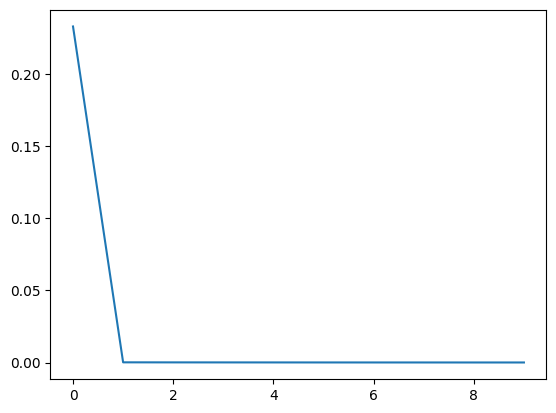

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the loss values from the history object
train_loss = history.history['loss']

# Create a new figure
plt.figure()

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')

In [ ]:
data_bcn_pred=combined_df[["x","y"]]

In [ ]:
# prompt: in combined_df make a column BCN which gives the prediction of each row

df_Y_BCN_pred=model1.predict(data_bcn_pred)
combined_df['BCN'] = df_Y_BCN_pred


11083/11083 [==============================] - 19s 2ms/step


In [ ]:
combined_df.head()

,x,y,p,u,v,t,enc_boundary_0,enc_boundary_1,enc_boundary_2,enc_boundary_3,...,enc_boundary_52,enc_boundary_53,enc_boundary_54,enc_boundary_55,enc_boundary_56,enc_boundary_57,enc_boundary_58,enc_boundary_59,BCN,inlet
0,-10.000000,-10.0,0.640101,1.000000,0.0,1.0,-0.219378,0.557131,-0.331021,0.058273,...,-1.194965,-0.87007,0.726857,-0.096534,-0.674249,0.209006,1.42026,0.698556,13.604595,1.0
1,-8.180341,-10.0,0.640072,1.000665,0.0,1.0,-0.219378,0.557131,-0.331021,0.058273,...,-1.194965,-0.87007,0.726857,-0.096534,-0.674249,0.209006,1.42026,0.698556,12.347690,1.0
2,-6.387341,-10.0,0.639889,1.002149,0.0,1.0,-0.219378,0.557131,-0.331021,0.058273,...,-1.194965,-0.87007,0.726857,-0.096534,-0.674249,0.209006,1.42026,0.698556,11.310919,1.0
3,-4.696190,-10.0,0.639206,1.004285,0.0,1.0,-0.219378,0.557131,-0.331021,0.058273,...,-1.194965,-0.87007,0.726857,-0.096534,-0.674249,0.209006,1.42026,0.698556,10.495078,1.0
4,-3.125059,-10.0,0.637585,1.005932,0.0,1.0,-0.219378,0.557131,-0.331021,0.058273,...,-1.194965,-0.87007,0.726857,-0.096534,-0.674249,0.209006,1.42026,0.698556,9.882538,1.0


In [ ]:
combined_df["inlet"]=1.00

In [ ]:
combined_df.to_csv("/content/drive/MyDrive/Classroom/data_train_pinn.csv")


In [ ]:
combined_df=pd.read_csv("/content/drive/MyDrive/Classroom/data_train_pinn.csv")

In [ ]:
# prompt: make a new dataframe X taking x,y,t all the enc_boundary columns from combined_df

df_X = combined_df[['x', 'y', 't'] + [f"enc_boundary_{i}" for i in range(0, 60)]]
df_Y = combined_df[['x', 'y', 't', "BCN", "inlet"]]

In [ ]:
df_X.shape[0],df_Y.shape[0]

(354640, 354640)

In [ ]:
'''
PINN
'''
'''
This is the PINN+the model that predicts the functions B and C which sir asked
'''
class PhysicsInformedNN:
    def __init__(self, layers1, layers2):
        self.layers1 = layers1#These are the units of the main PINN
        self.layers2 = layers2#These are the units of the 2nd ANN for B and C
        self.lambda_1 = 1.0
        self.lambda_2 = 0.01
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        self.build_model()#This function builds/compiles the model

    def build_model(self):
        inputs1 = Input(shape=(63,))#Inputs for pinn including 3 x,y,t and 60 columns for encoded vector
        inputs2 = Input(shape=(5,))#the x,y,t,result of BCN,inflow speed
        x = inputs1#takes the imputs of the pinn
        for i in range(len(self.layers1) - 2):
            x = Dense(self.layers1[i+1], activation='tanh')(x)#keras dense layers of pinn
        u_v_p = Dense(self.layers1[-1])(x)#gives the output of the pinn
        u = u_v_p[:, 0:1]
        v = u_v_p[:, 1:2]
        p = u_v_p[:, 2:3]
        y = Concatenate()([inputs2, u, v, p])#now we join x,y,t,BCN,inflow speed with predicted u,v,p
        for i in range(len(self.layers2) - 2):
            y = Dense(self.layers2[i+1], activation='tanh')(y)#passing the 2nd inputs through the ANN to predict B and C relations
        outputs2 = Dense(self.layers2[-1])(y)# Gives final outputs u,v,p
        self.model = Model(inputs=[inputs1, inputs2], outputs=outputs2) #Model building process

    def loss_function(self, inputs, u_true, v_true, p_true): #Loss function of PINN+2nd ANN
        X, Y = inputs
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(X)#we are keeping track of x,y,t
            predictions = self.model([X, Y])#Making the predictions
            u_pred = predictions[:, 0:1]
            v_pred = predictions[:, 1:2]
            p_pred = predictions[:, 2:3]
            '''
            Next few lines calculate the gradients
            '''
            u_t = tape.gradient(u_pred, X)[:, 2:3]
            u_x = tape.gradient(u_pred, X)[:, 0:1]
            u_y = tape.gradient(u_pred, X)[:, 1:2]

            v_t = tape.gradient(v_pred, X)[:, 2:3]
            v_x = tape.gradient(v_pred, X)[:, 0:1]
            v_y = tape.gradient(v_pred, X)[:, 1:2]

            p_x = tape.gradient(p_pred, X)[:, 0:1]
            p_y = tape.gradient(p_pred, X)[:, 1:2]
        '''
        since we already have the relations of u with t etc we can calulate the 2nd order gradients outside the tracking here
        '''
        u_xx = tape.gradient(u_x, X)[:, 0:1]
        u_yy = tape.gradient(u_y, X)[:, 1:2]
        v_xx = tape.gradient(v_x, X)[:, 0:1]
        v_yy = tape.gradient(v_y, X)[:, 1:2]
        '''
        The differential equations. We have included the continuity one as well as potential would be very hard in our case
        '''
        f = u_t + self.lambda_1 * (u_pred * u_x + v_pred * u_y) + p_x + self.lambda_2 * (u_xx + u_yy)
        g = v_t + self.lambda_1 * (u_pred * v_x + v_pred * v_y) + p_y + self.lambda_2 * (v_xx + v_yy)
        h = u_x + v_y
        #The losses
        mse_loss = tf.reduce_sum(tf.square(u_true - u_pred)) + tf.reduce_sum(tf.square(v_true - v_pred)) + tf.reduce_sum(tf.square(p_true - p_pred))
        phys_loss = tf.reduce_sum(tf.square(f)) + tf.reduce_sum(tf.square(g)) + tf.reduce_sum(tf.square(h))

        total_loss = mse_loss + phys_loss

        return total_loss

    @tf.function#This increases and accuracy of tensorflow operation
    def train_step(self, X, Y, u_true, v_true, p_true):#Defines each step of training
        #the below process I have explained in the SEN part
        with tf.GradientTape() as tape:
            loss = self.loss_function([X, Y], u_true, v_true, p_true)

        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss

    def train(self, X, Y, u_true, v_true, p_true, epochs):
        #full training loop with printing the loss
        time1=time.time()
        time3=time1
        for epoch in range(epochs):
            self.train_step(X, Y, u_true, v_true, p_true)
            if epoch % 100 == 0:
                loss = self.loss_function([X, Y], u_true, v_true, p_true)
                time2=time.time()
                print(f'Epoch {epoch}, Loss: {loss.numpy()}, time {time2-time3}')
                time3=time2#loss.numpy() has been proposed by colab for an error I was encountering

layers1 = [80, 80, 80, 80, 80, 80, 80, 3]#Here you can change the defination of the PINN
layers2 = [8, 256, 128, 64, 3]#Here for the function approximating B and C
model = PhysicsInformedNN(layers1, layers2) #Calling the model

'''
Creation of dummy data with uniform distribution
'''
#X = tf.random.uniform([10000, 63], -1, 1)
X=tf.convert_to_tensor(df_X,dtype=tf.float32)
Y=tf.convert_to_tensor(df_Y,dtype=tf.float32)
u_true = tf.convert_to_tensor(combined_df['u'],dtype=tf.float32)
v_true = tf.convert_to_tensor(combined_df['v'],dtype=tf.float32)
p_true = tf.convert_to_tensor(combined_df['p'],dtype=tf.float32)
#u_true = tf.random.uniform([240000, 1], -1, 1)
#v_true = tf.random.uniform([240000, 1], -1, 1)
#p_true = tf.random.uniform([240000, 1], -1, 1)

# Get the number of data points

# Generate a list of random indices
random_indices = random.sample(range(354640), 10000)
# Extract the data for the random indices
X_5000 = tf.gather(X, random_indices)
Y_5000 = tf.gather(Y, random_indices)
u_true_5000 = tf.gather(u_true, random_indices)
v_true_5000 = tf.gather(v_true, random_indices)
p_true_5000 = tf.gather(p_true, random_indices)

model.train(X_5000, Y_5000, u_true_5000, v_true_5000, p_true_5000, epochs=10000)#Training command


Epoch 0, Loss: 0.5148015022277832, time 11.848099708557129
Epoch 100, Loss: 0.30901244282722473, time 27.370105743408203
Epoch 200, Loss: 0.3085295259952545, time 26.837631464004517


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import numpy as np
from scipy.optimize import minimize
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

class PhysicsInformedNN:
    def __init__(self, layers1, layers2):
        self.layers1 = layers1  # Units of the main PINN
        self.layers2 = layers2  # Units of the 2nd ANN for B and C
        self.lambda_1 = 1.0
        self.lambda_2 = 0.01
        self.build_model()

    def build_model(self):
        inputs1 = Input(shape=(63,))  # Inputs for PINN
        inputs2 = Input(shape=(5,))  # Inputs for 2nd ANN
        x = inputs1
        for i in range(len(self.layers1) - 2):
            x = Dense(self.layers1[i+1], activation='tanh')(x)  # Dense layers of PINN
        u_v_p = Dense(self.layers1[-1])(x)
        u = u_v_p[:, 0:1]
        v = u_v_p[:, 1:2]
        p = u_v_p[:, 2:3]
        y = Concatenate()([inputs2, u, v, p])
        for i in range(len(self.layers2) - 2):
            y = Dense(self.layers2[i+1], activation='tanh')(y)  # Dense layers of 2nd ANN
        outputs2 = Dense(self.layers2[-1])(y)
        self.model = Model(inputs=[inputs1, inputs2], outputs=outputs2)

    def loss_function(self, inputs, u_true, v_true, p_true):
        X, Y = inputs
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(X)
            predictions = self.model([X, Y])
            u_pred = predictions[:, 0:1]
            v_pred = predictions[:, 1:2]
            p_pred = predictions[:, 2:3]

            u_t = tape.gradient(u_pred, X)[:, 2:3]
            u_x = tape.gradient(u_pred, X)[:, 0:1]
            u_y = tape.gradient(u_pred, X)[:, 1:2]

            v_t = tape.gradient(v_pred, X)[:, 2:3]
            v_x = tape.gradient(v_pred, X)[:, 0:1]
            v_y = tape.gradient(v_pred, X)[:, 1:2]

            p_x = tape.gradient(p_pred, X)[:, 0:1]
            p_y = tape.gradient(p_pred, X)[:, 1:2]

        u_xx = tape.gradient(u_x, X)[:, 0:1]
        u_yy = tape.gradient(u_y, X)[:, 1:2]
        v_xx = tape.gradient(v_x, X)[:, 0:1]
        v_yy = tape.gradient(v_y, X)[:, 1:2]

        f = u_t + self.lambda_1 * (u_pred * u_x + v_pred * u_y) + p_x + self.lambda_2 * (u_xx + u_yy)
        g = v_t + self.lambda_1 * (u_pred * v_x + v_pred * v_y) + p_y + self.lambda_2 * (v_xx + v_yy)
        h = u_x + v_y

        mse_loss = tf.reduce_mean(tf.square(u_true - u_pred)) + tf.reduce_mean(tf.square(v_true - v_pred)) + tf.reduce_mean(tf.square(p_true - p_pred))
        phys_loss = tf.reduce_mean(tf.square(f)) + tf.reduce_mean(tf.square(g)) + tf.reduce_mean(tf.square(h))

        total_loss = mse_loss + phys_loss

        return total_loss

    def get_weights(self):
        weights = []
        for layer in self.model.layers:
            weights.extend(layer.get_weights())
        return np.concatenate([w.flatten() for w in weights])

    def set_weights(self, flat_weights):
        new_weights = []
        start = 0
        for layer in self.model.layers:
            shapes = [w.shape for w in layer.get_weights()]
            sizes = [np.prod(shape) for shape in shapes]
            end = start + sum(sizes)
            new_weights.append([flat_weights[start:start+size].reshape(shape) for size, shape in zip(sizes, shapes)])
            start = end
        for layer, new_weight in zip(self.model.layers, new_weights):
            layer.set_weights(new_weight)

    def loss_and_grads(self, flat_weights, X, Y, u_true, v_true, p_true):
        self.set_weights(flat_weights)
        with tf.GradientTape() as tape:
            loss = self.loss_function([X, Y], u_true, v_true, p_true)
        grads = tape.gradient(loss, self.model.trainable_variables)
        grads_flat = np.concatenate([tf.reshape(grad, [-1]).numpy() for grad in grads])
        return loss.numpy(), grads_flat

    def train_lbfgs(self, X, Y, u_true, v_true, p_true):
        init_params = self.get_weights()
        self.iteration = 0  # Initialize iteration counter

        def callback(params):
            self.iteration += 1
            if self.iteration % 100 == 0:
                self.set_weights(params)
                loss = self.loss_function([X, Y], u_true, v_true, p_true)
                print(f'Iteration {self.iteration}, Loss: {loss.numpy()}')

        result = minimize(fun=self.loss_and_grads,
                          x0=init_params,
                          args=(X, Y, u_true, v_true, p_true),
                          method='L-BFGS-B',
                          jac=True,
                          callback=callback,
                          options={'maxiter': 10000, 'disp': True})
        self.set_weights(result.x)

    def predict(self, X, Y):
        return self.model.predict([X, Y])

layers1 = [63, 80, 80, 80, 80, 80, 80, 3]  # PINN layers
layers2 = [8, 256, 128, 64, 3]  # ANN layers for B and C
model = PhysicsInformedNN(layers1, layers2)

# Example data (replace with your actual data)
X = tf.random.uniform([10000, 63], -1, 1)
Y = tf.random.uniform([10000, 5], -1, 1)
u_true = tf.random.uniform([10000, 1], -1, 1)
v_true = tf.random.uniform([10000, 1], -1, 1)
p_true = tf.random.uniform([10000, 1], -1, 1)

# Train the model
model.train_lbfgs(X, Y, u_true, v_true, p_true)

# Example prediction
X_test = tf.random.uniform([5, 63], -1, 1)
Y_test = tf.random.uniform([5, 5], -1, 1)
predictions = model.predict(X_test, Y_test)
print(predictions)


In [ ]:
# prompt: give accuracy of u v and p predicted by using the formula of error/actual

error_u = tf.reduce_mean(tf.abs(u_true_5000 - model.predict(X_5000, Y_5000)[:, 0:1])) / tf.reduce_mean(tf.abs(u_true_5000)) * 100
error_v = tf.reduce_mean(tf.abs(v_true_5000 - model.predict(X_5000, Y_5000)[:, 1:2])) / tf.reduce_mean(tf.abs(v_true_5000)) * 100
error_p = tf.reduce_mean(tf.abs(p_true_5000 - model.predict(X_5000, Y_5000)[:, 2:3])) / tf.reduce_mean(tf.abs(p_true_5000)) * 100

print(f"Reconstruction accuracy of u: {100.00-error_u:.2f}%")
print(f"Reconstruction accuracy of v: {100.00-error_v:.2f}%")
print(f"Reconstruction accuracy of p: {100.00-error_p:.2f}%")


313/313 [==============================] - 1s 2ms/step
Reconstruction accuracy of u: 68.37%
Reconstruction accuracy of v: -0.72%
Reconstruction accuracy of p: 60.40%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from scipy.optimize import minimize
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

class PhysicsInformedNN:
    def __init__(self, layers1, layers2):
        self.layers1 = layers1  # Units of the main PINN
        self.layers2 = layers2  # Units of the 2nd ANN for B and C
        self.lambda_1 = 1.0
        self.lambda_2 = 0.01
        self.build_model()

    def build_model(self):
        inputs1 = Input(shape=(63,))  # Inputs for PINN
        inputs2 = Input(shape=(5,))  # Inputs for 2nd ANN
        x = inputs1
        for i in range(len(self.layers1) - 2):
            x = Dense(self.layers1[i+1], activation='tanh')(x)  # Dense layers of PINN
        u_v_p = Dense(self.layers1[-1])(x)
        u = u_v_p[:, 0:1]
        v = u_v_p[:, 1:2]
        p = u_v_p[:, 2:3]
        y = Concatenate()([inputs2, u, v, p])
        for i in range(len(self.layers2) - 2):
            y = Dense(self.layers2[i+1], activation='tanh')(y)  # Dense layers of 2nd ANN
        outputs2 = Dense(self.layers2[-1])(y)
        self.model = Model(inputs=[inputs1, inputs2], outputs=outputs2)

    def loss_function(self, inputs, u_true, v_true, p_true):
        X, Y = inputs
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(X)
            predictions = self.model([X, Y])
            u_pred = predictions[:, 0:1]
            v_pred = predictions[:, 1:2]
            p_pred = predictions[:, 2:3]

            u_t = tape.gradient(u_pred, X)[:, 2:3]
            u_x = tape.gradient(u_pred, X)[:, 0:1]
            u_y = tape.gradient(u_pred, X)[:, 1:2]

            v_t = tape.gradient(v_pred, X)[:, 2:3]
            v_x = tape.gradient(v_pred, X)[:, 0:1]
            v_y = tape.gradient(v_pred, X)[:, 1:2]

            p_x = tape.gradient(p_pred, X)[:, 0:1]
            p_y = tape.gradient(p_pred, X)[:, 1:2]

        u_xx = tape.gradient(u_x, X)[:, 0:1]
        u_yy = tape.gradient(u_y, X)[:, 1:2]
        v_xx = tape.gradient(v_x, X)[:, 0:1]
        v_yy = tape.gradient(v_y, X)[:, 1:2]

        f = u_t + self.lambda_1 * (u_pred * u_x + v_pred * u_y) + p_x + self.lambda_2 * (u_xx + u_yy)
        g = v_t + self.lambda_1 * (u_pred * v_x + v_pred * v_y) + p_y + self.lambda_2 * (v_xx + v_yy)
        h = u_x + v_y

        mse_loss = tf.reduce_mean(tf.square(u_true - u_pred)) + tf.reduce_mean(tf.square(v_true - v_pred)) + tf.reduce_mean(tf.square(p_true - p_pred))
        phys_loss = tf.reduce_mean(tf.square(f)) + tf.reduce_mean(tf.square(g)) + tf.reduce_mean(tf.square(h))

        total_loss = mse_loss + phys_loss

        return total_loss

    def get_weights(self):
        weights = []
        for layer in self.model.layers:
            weights.extend(layer.get_weights())
        return np.concatenate([w.flatten() for w in weights])

    def set_weights(self, flat_weights):
        new_weights = []
        start = 0
        for layer in self.model.layers:
            shapes = [w.shape for w in layer.get_weights()]
            sizes = [np.prod(shape) for shape in shapes]
            end = start + sum(sizes)
            new_weights.append([flat_weights[start:start+size].reshape(shape) for size, shape in zip(sizes, shapes)])
            start = end
        for layer, new_weight in zip(self.model.layers, new_weights):
            layer.set_weights(new_weight)

    def loss_and_grads(self, flat_weights, X, Y, u_true, v_true, p_true):
        self.set_weights(flat_weights)
        with tf.GradientTape() as tape:
            loss = self.loss_function([X, Y], u_true, v_true, p_true)
        grads = tape.gradient(loss, self.model.trainable_variables)
        grads_flat = np.concatenate([tf.reshape(grad, [-1]).numpy() for grad in grads])
        return loss.numpy(), grads_flat

    def train_lbfgs(self, X, Y, u_true, v_true, p_true):
        init_params = self.get_weights()
        self.iteration = 0  # Initialize iteration counter

        def callback(params):
            self.iteration += 1
            if self.iteration % 100 == 0:
                self.set_weights(params)
                loss = self.loss_function([X, Y], u_true, v_true, p_true)
                print(f'Iteration {self.iteration}, Loss: {loss.numpy()}')

        result = minimize(fun=self.loss_and_grads,
                          x0=init_params,
                          args=(X, Y, u_true, v_true, p_true),
                          method='L-BFGS-B',
                          jac=True,
                          callback=callback,
                          options={'maxiter': 10000, 'disp': True})
        self.set_weights(result.x)

    def predict(self, X, Y):
        return self.model.predict([X, Y])

layers1 = [63, 80, 80, 80, 80, 80, 80, 3]  # PINN layers
layers2 = [8, 256, 128, 64, 3]  # ANN layers for B and C
model = PhysicsInformedNN(layers1, layers2)
X=tf.convert_to_tensor(df_X,dtype=tf.float32)
Y=tf.convert_to_tensor(df_Y,dtype=tf.float32)
u_true = tf.convert_to_tensor(combined_df['u'],dtype=tf.float32)
v_true = tf.convert_to_tensor(combined_df['v'],dtype=tf.float32)
p_true = tf.convert_to_tensor(combined_df['p'],dtype=tf.float32)
#u_true = tf.random.uniform([240000, 1], -1, 1)
#v_true = tf.random.uniform([240000, 1], -1, 1)
#p_true = tf.random.uniform([240000, 1], -1, 1)

# Get the number of data points

# Generate a list of random indices
random_indices = random.sample(range(354640), 10000)
# Extract the data for the random indices
X_5000 = tf.gather(X, random_indices)
Y_5000 = tf.gather(Y, random_indices)
u_true_5000 = tf.gather(u_true, random_indices)
v_true_5000 = tf.gather(v_true, random_indices)
p_true_5000 = tf.gather(p_true, random_indices)

model.train_lbfgs(X_5000, Y_5000, u_true_5000, v_true_5000, p_true_5000)#Training command


Iteration 100, Loss: 0.3023625612258911
